In [1]:
using PyPlot
using LsqFit

In [24]:
data1 = readdlm("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw4/ttv_planet1.txt")
data2 = readdlm("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw4/ttv_planet2.txt") ;

In [25]:
times1 = reshape(data1, length(data1))
times2 = reshape(data2, length(data2)) 

24-element Array{Float64,1}:
  8461.76
  8827.02
  9192.27
  9557.53
  9922.79
 10288.0 
 10653.3 
 11018.6 
 11383.8 
 11749.1 
 12114.3 
 12479.6 
 12844.8 
 13210.1 
 13575.4 
 13940.6 
 14305.9 
 14671.1 
 15036.4 
 15401.6 
 15766.9 
 16132.1 
 16497.4 
 16862.7 

In [26]:
data3 = linspace(0.0, 17328., 5)
times3 = reshape(data3, length(data3))

5-element Array{Float64,1}:
     0.0
  4332.0
  8664.0
 12996.0
 17328.0

In [27]:
data3 = linspace(0.0, 17328.4, int(17328.2/3465.3))
times3 = reshape(data3, length(data3))
println(times3)

[0

In [28]:
period(times3)

4332.1

.0,4332.1,8664.2,12996.3,17328.4]


In [29]:
function period(times)
    dt = zeros(length(times)-1)
    for i in range(1, length(times)-1)
        dt[i] = times[i+1] - times[i]
    end
    return mean(dt)
end

period (generic function with 1 method)

In [30]:
println(period(times1))
println(period(times2))

224.

In [31]:
include("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw4/compute_ttv.jl")

TTVFaster

70076641863517
365.25630708152175


In [32]:
function ttv_wrapper(time1, time2, p)
    #Parameters for planet 1
    mass_ratio1 = p[1]
    per1 = p[2]
    trans01 = p[3]
    ecosw1 = p[4]
    esinw1 = p[5]
    
    #Paramters for planet 2
    mass_ratio2 = p[6]
    per2 = p[7]
    trans02 = p[8]
    ecosw2 = p[9]
    esinw2 = p[10]
    
    #Make planets using TTVFaster.planet_planet.hk
    planet1 = TTVFaster.Planet_plane_hk(mass_ratio1, per1, trans01, ecosw1, esinw1)
    planet2 = TTVFaster.Planet_plane_hk(mass_ratio2, per2, trans02, ecosw2, esinw2)
    
    #Make empty arrays for ttv1 and ttv2 that will be created in the computer_ttv! function
    ttv1 = zeros(length(time1))
    ttv2 = zeros(length(time2))
    
    #Feed things into compute_ttv function
    jmax = 3
    TTVFaster.compute_ttv!(jmax, planet1, planet2, time1, time2, ttv1, ttv2)
    
    return ttv1, ttv2
end

ttv_wrapper (generic function with 1 method)

In [33]:
#Parameters used for feeding in planet 1 and planet 2
params12 = [3.0E-6, period(times1), 1, 0.05, 0.05, 3.0E-6, period(times2), 1, 0.05, 0.05]
ttv12, ttv21 = ttv_wrapper(times1, times2, params12)

0.7233323464093737

([-0.00201465,-0.00222806,0.00325549,0.00324175,-7.23003e-5,-0.00344193,-0.00330586,0.00252533,0.00242295,-0.000227372  …  0.00315763,0.00309718,-9.07616e-5,-0.00352157,-0.00334646,0.00267147,0.00264511,-0.000161816,-0.000372817,-0.000824482],[5.4338e-5,-0.000555291,0.000588559,-0.0017833,0.00052558,0.00236311,-0.00121052,-6.37499e-7,0.000165697,-0.000589279  …  -0.0012313,3.0544e-5,0.000277967,-0.00062208,0.000443908,-0.00177024,0.000486459,0.00235072,-0.00125247,6.3001e-5])

224.70076641863517365.25630708152175


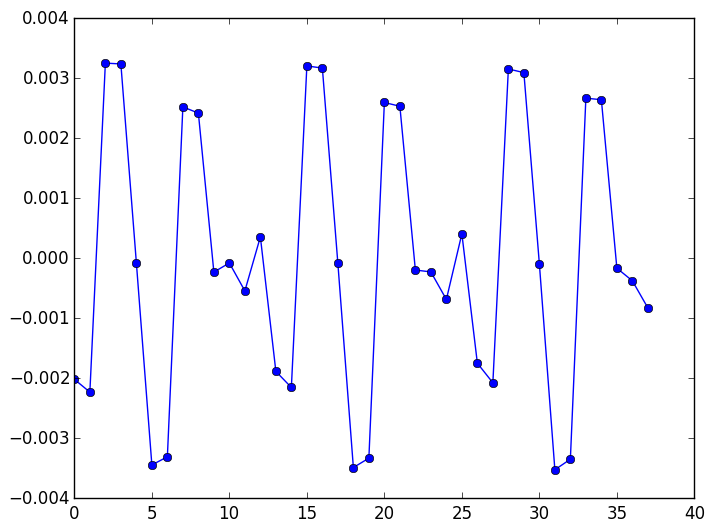

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320635550>

In [34]:
plot(ttv12, "o-")

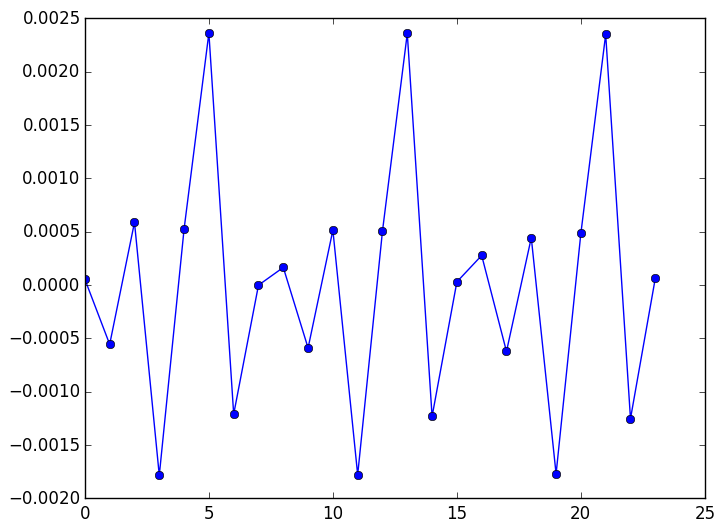

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320816250>

In [35]:
plot(ttv21, "o-")

In [36]:
#Set up params for planet 1 and planet 3
#Parameters for planet 1
   # mass_ratio1 = p[1]
    #per1 = p[2]
    #trans01 = p[3]
    #ecosw1 = p[4]
    #esinw1 = p[5]
    
    #Paramters for planet 2
    #mass_ratio2 = p[6]
    #per2 = p[7]
    #trans02 = p[8]
    #ecosw2 = p[9]
    #esinw2 = p[10]
params13 = [3.0E-6, period(times1), 1, 0.05, 0.05, 1.0E-3, period(times3), 1., 0.05, 0.05]
ttv13, ttv31 = ttv_wrapper(times1, times3, params13)

0.13908193377450603

([-0.000332117,-0.000139292,-1.93429e-5,5.27858e-5,0.000120237,0.000228743,0.000408095,0.000650753,0.000898641,0.00105358  …  0.00102589,0.00105026,0.000840139,0.000409459,-0.000139323,-0.000653743,-0.000996477,-0.00110117,-0.000989467,-0.000745945],[-1.1748219926722333e-5,-0.00026821532059132587,0.00011587763556467117,0.0002255450131741419,-0.00020419912884046134])

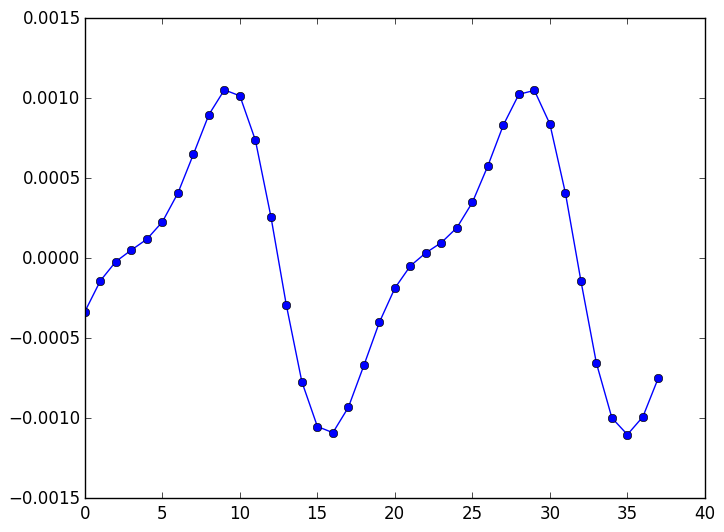

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321277ed0>

In [37]:
plot(ttv13, "-o")

In [38]:
params23 = [3.0E-6, period(times2), 1, 0.05, 0.05, 1.0E-3, period(times3), 1., 0.05, 0.05]
ttv23, ttv32 = ttv_wrapper(times2, times3, params23) ;

224.700766418635174332.1
0.1922794334650035

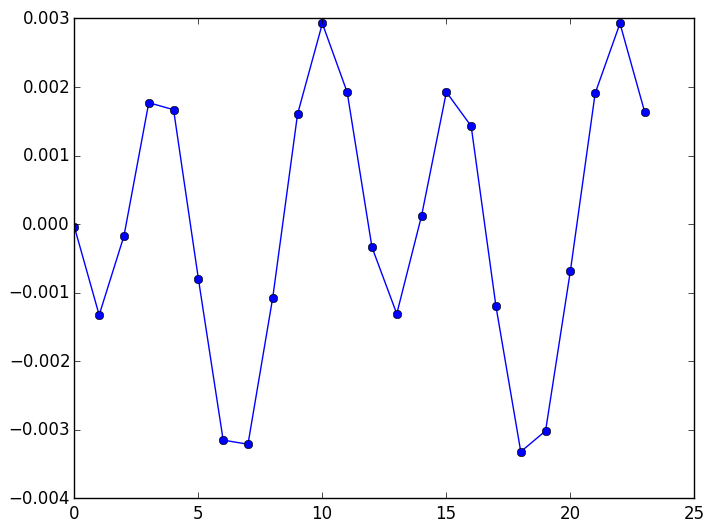

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3214c2190>

In [39]:
plot(ttv23, "-o")

365.256307081521754332.1


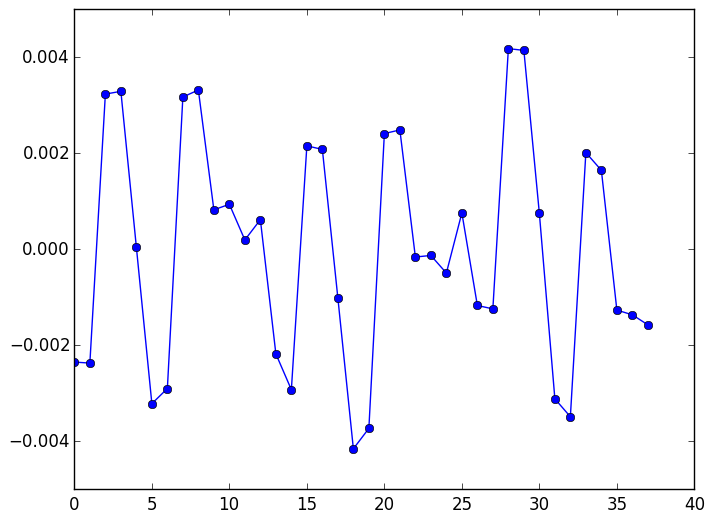

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3216d2850>

In [40]:
plot(ttv12+ttv13, "-o")

times

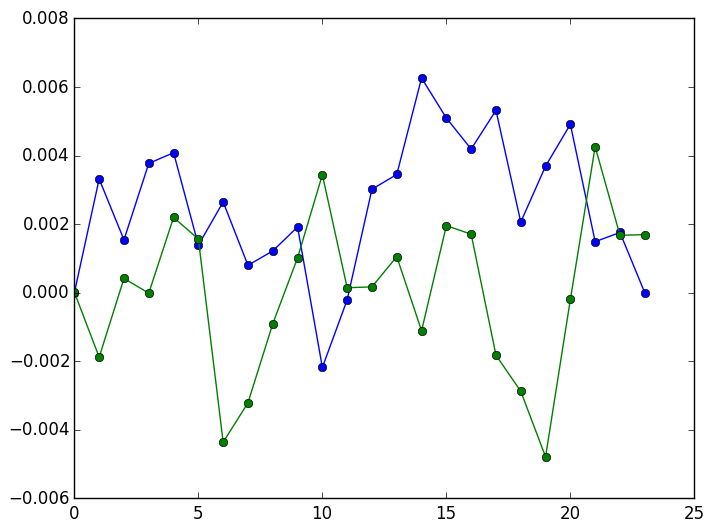

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321914390>

[0.0,365.2596249020007,730.5141569560001,1095.7726929150012,1461.029312644001,1826.2829238305003,2191.540489934001,2556.7949496096007,2922.0516753270003,3287.3086818976008,3652.5608914045006,4017.8191714490004,4383.078703880001,4748.335441168001,5113.594561345701,5478.8497008344,5844.1051035,6209.362539846201,6574.615587595601,6939.873527288,7305.131053846,7670.383937791001,8035.6405125705005,8400.895062875]
test[0.0,365.25630708152175,730.5126141630435,1095.7689212445653,1461.025228326087,1826.281535407609,2191.5378424891305,2556.7941495706523,2922.050456652174,3287.3067637336962,3652.563070815218,4017.8193778967398,4383.075684978261,4748.331992059783,5113.588299141305,5478.844606222827,5844.100913304348,6209.35722038587,6574.6135274673925,6939.869834548914,7305.126141630436,7670.382448711957,8035.6387557934795,8400.895062875]


In [41]:

test = linspace(0,23.0,24).*365.25630708152175
test_test = reshape(test, length(test))
println("times", times2.-8461.757350445)
println("test", test_test)
plot((times2.-8461.757350445).-test_test, "o-")
plot(ttv21+ttv23, "o-")

In [42]:
function combined_ttv(times1, times2, p)
    # p is the parameters for the third planet
    # assuming we know the paremeter for the first two
    data3 = linspace(0.0, 17328., int(17328.2/p[2]))
    times3 = reshape(data3, length(data3))
    params12 = [p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10]]
    params23 = [p[6], p[7], p[8], p[9], p[10], p[11], p[12], p[13], p[14], p[15]]
    
    ttv23, ttv32 = ttv_wrapper(times2, times3, params23)
    ttv12, ttv21 = ttv_wrapper(times1, times2, params12)
    return  ttv13+ttv12, ttv21+ttv23
end

function fake_chisquare(times, ttv_comb)
    P = period(times)
    time_array = linspace(0,length(times)-1,length(times)).*P
    time_reshaped = reshape(time_array, length(time_array))
    ttv = (times .- times[1]) .- time_reshaped
    chi_square = 0.0
    for i in range(1, length(times))
        chi_square += (ttv[i] - ttv_comb[i])^2
    end
    return chi_square
end

function plot_result(times, model)
    P = period(times)
    time_array = linspace(0,length(times)-1,length(times)).*P
    time_reshaped = reshape(time_array, length(time_array))
    ttv = (times .- times[1]) .- time_reshaped
    plot(ttv, "-o")
    plot(model, "-o")
end



plot_result (generic function with 1 method)

In [43]:
# This script fits transiting planet data, mystery_planet2.txt
# Eric Agol April 2016
# The following occur:
# 1). A transit model function is defined, transit_model, using
#     the quadratic limb-darkening model, occultquad.jl
# 2). The data are read in, and an initial fit is computed.
# 3). A Markov chain is run.
# 4). Various parameters of the fit are computed, along with uncertainties
#using ExoJulia


#Set up params for planet 1 and planet 3
#Parameters for planet 1
   # mass_ratio1 = p[1]
    #per1 = p[2]
    #trans01 = p[3]
    #ecosw1 = p[4]
    #esinw1 = p[5]
    
    #Paramters for planet 2
    #mass_ratio2 = p[6]
    #per2 = p[7]
    #trans02 = p[8]
    #ecosw2 = p[9]
    #esinw2 = p[10
    
    
index_model = 1 # 2 would be for planet 2
times = [times1, times2, times3]
# initial guesses for planets 1, 2, 3
p = [2.45E-6, period(times1), 1., 0.05, 0.05, 3.0E-6, period(times2), 1., 0.05, 0.05, 9.543e-4, 4332.59, 1., 0.05, 0.05]
weight = 1
nparam = 15
errors = [5e-6, 10., .1, .5, .5, 5e-6, 10., .1, .5, .5, 1e-2, 100., .1, .5, .5]
model_best = combined_ttv(times1, times2, p)[index_model]
chi_best = fake_chisquare(times[index_model], model_best)
p_best = p
# Now, run an affine-invariant markov chain:
# Foreman-Mackey et al. (2014) - 'emc' 'mcmc hammer'

nwalkers = nparam * 3
nsteps = 100000
#nsteps = 100
# Set up arrays to hold the results:
par_mcmc = zeros(nwalkers,nsteps,nparam)
chi_mcmc = zeros(nwalkers,nsteps)
# Initialize walkers:
par_trial = p
for j=1:nwalkers
# Select from within uncertainties:
  chi_trial = 1e100
# Only initiate models with reasonable chi-square values:
  while chi_trial > (chi_best + 1000)
    par_trial = p + errors.*randn(nparam)
    model_trial = combined_ttv(times1, times2, p)[index_model]
    chi_trial = fake_chisquare(times2, model_trial)
    if chi_trial < chi_best
        model_best = model_trial
        chi_best = chi_trial
        p_best = par_trial
    end
  end
  chi_mcmc[j,1]=chi_trial
  par_mcmc[j,1,:]=par_trial
  println("Success: ",par_trial,chi_trial)
end


# Initialize scale length & acceptance counter:
ascale = 2.0
accept = 0
# Next, loop over steps in markov chain:
for i=2:nsteps
  for j=1:nwalkers
    ipartner = j
# Choose another walker to 'breed' a trial step with:
    while ipartner == j
      ipartner = ceil(Int,rand()*nwalkers)
    end
# Now, choose a new set of parameters for the trial step:
    z=(rand()*(sqrt(ascale)-1.0/sqrt(ascale))+1.0/sqrt(ascale))^2
    par_trial=vec(z*par_mcmc[j,i-1,:]+(1.0-z)*par_mcmc[ipartner,i-1,:])
# Compute model & chi-square:    
    model_trial = combined_ttv(times1, times2, par_trial)
    chi_trial = fake_chisquare(times2, model_trial)
# Next, determine whether to accept this trial step:
    alp = z^(nparam-1)*exp(-0.5*(chi_trial - chi_mcmc[j,i-1]))
    if alp >= rand()
# If step is accepted, add it to the chains!
      par_mcmc[j,i,:] = par_trial
      chi_mcmc[j,i,:] = chi_trial
      accept = accept + 1
    else
# If step is rejected, then copy last step:
      par_mcmc[j,i,:] = par_mcmc[j,i-1,:]
      chi_mcmc[j,i,:] = chi_mcmc[j,i-1]
    end
  end
  if mod(i,1000) == 0
    frac_acc = accept/(1000*nwalkers)
    println("Number of steps: ",i," acceptance rate: ",frac_acc)
    ascale = 1.0 + (frac_acc/0.25)*(ascale-1.0)
    accept = 0
  end
end

# Now, determine time of burn-in by calculating first time median is crossed:
iburn = 0
for i=1:nparam
  med_param=median(par_mcmc[1:nwalkers,1:nsteps,i])
  for j=1:nwalkers
    istep=2
    while (par_mcmc[j,istep,i] > med_param) == (par_mcmc[j,istep-1,i] > med_param) && (istep < nsteps)
      istep=istep+1
    end
    if istep >= iburn
      iburn = istep
    end
  end
end

println("Burn-in ends: ",iburn)




0.19226493579372322

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Volumes/Julia/Julia-0.4.5.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/mlazz/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/mlazz/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[43], in expression starting on line 29
 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 in combined_ttv at In[42]:4
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/mlazz/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/mlazz/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[43], in expression starting on line 35


365.256307081521754332.59
0.7233323464093737224.70076641863517365.25630708152175
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Success: [2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]1.0e100
Su

LoadError: LoadError: MethodError: `*` has no method matching *(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},S}(!Matched::Union{DenseArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2},SubArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}, ::Union{DenseArray{S,1},SubArray{S,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  *{TA,TB}(!Matched::Base.LinAlg.AbstractTriangular{TA,S<:AbstractArray{T,2}}, ::Union{DenseArray{TB,1},DenseArray{TB,2},SubArray{TB,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD},SubArray{TB,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  ...
while loading In[43], in expression starting on line 73

365.256307081521754332.59
0.7233323464093737224.70076641863514365.25630708152175
[

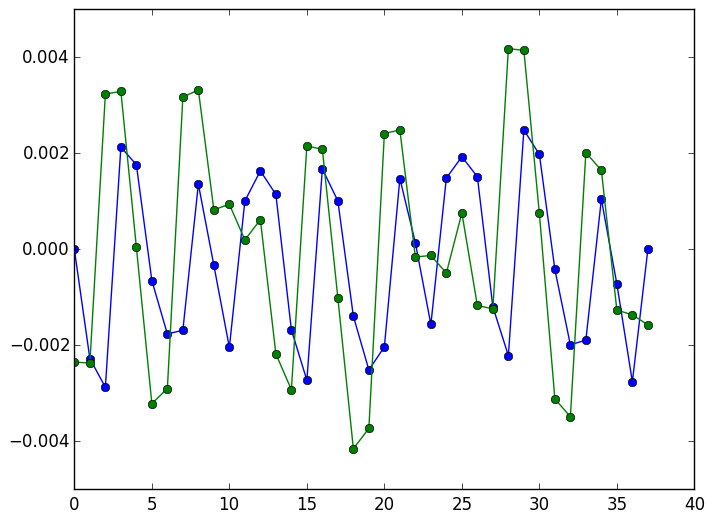

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x344035fd0>

2.45e-6,224.70076641863517,1.0,0.05,0.05,3.0e-6,365.25630708152175,1.0,0.05,0.05,0.0009543,4332.59,1.0,0.05,0.05]


In [44]:
println(p_best)
plot_result(times1,model_best)